In [112]:
import pandas as pd 
import numpy as np
import json
from sim_result_processor import TableProcessor

In [116]:
with open('/Users/daixinming/Documents/Phd/2025_Spring/Applied Statistics/RandNLA_Regression/sim_result.json', 'r') as file:
    html_content = json.load(file)

In [ ]:
html = html_content['delta_0_1_cauchy']
sim_result = TableProcessor(html_table=html)
sim_result.table_processor()
sim_result.toarray()
print(sim_result.methods)
print(sim_result.nparray.shape)
print(sim_result.df)

0                   Huber
1                     OLS
2       clarkson_woodruff
3                  normal
4               proposal1
5     proposal1(adaptive)
6               proposal2
7     proposal2(adaptive)
8             sparse_sign
9           uniform_dense
10         uniform_sparse
Name: (k, sketch), dtype: object
(2, 11, 4)
                       20                 40                 80  \
       Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1   
0         0.0002 ± 0.0000    0.0002 ± 0.0000    0.0002 ± 0.0000   
1         1.2186 ± 0.0421    1.2186 ± 0.0421    1.2186 ± 0.0421   
2    3087.4627 ± 395.9681   62.4082 ± 2.8958   22.9365 ± 0.9959   
3    3647.9810 ± 470.0464   59.9009 ± 2.6236   22.8845 ± 1.0887   
4    2418.2769 ± 358.4407    2.9827 ± 0.4232    0.0248 ± 0.0021   
5    2734.6393 ± 402.8865   16.5652 ± 1.8400    0.3196 ± 0.0242   
6   8686.2092 ± 1242.3819    0.0144 ± 0.0012    0.0046 ± 0.0003   
7    2501.9426 ± 370.3778   30.7145 ± 2.2962    5.1501 ± 0.4921   


# next step: convert the data to this format

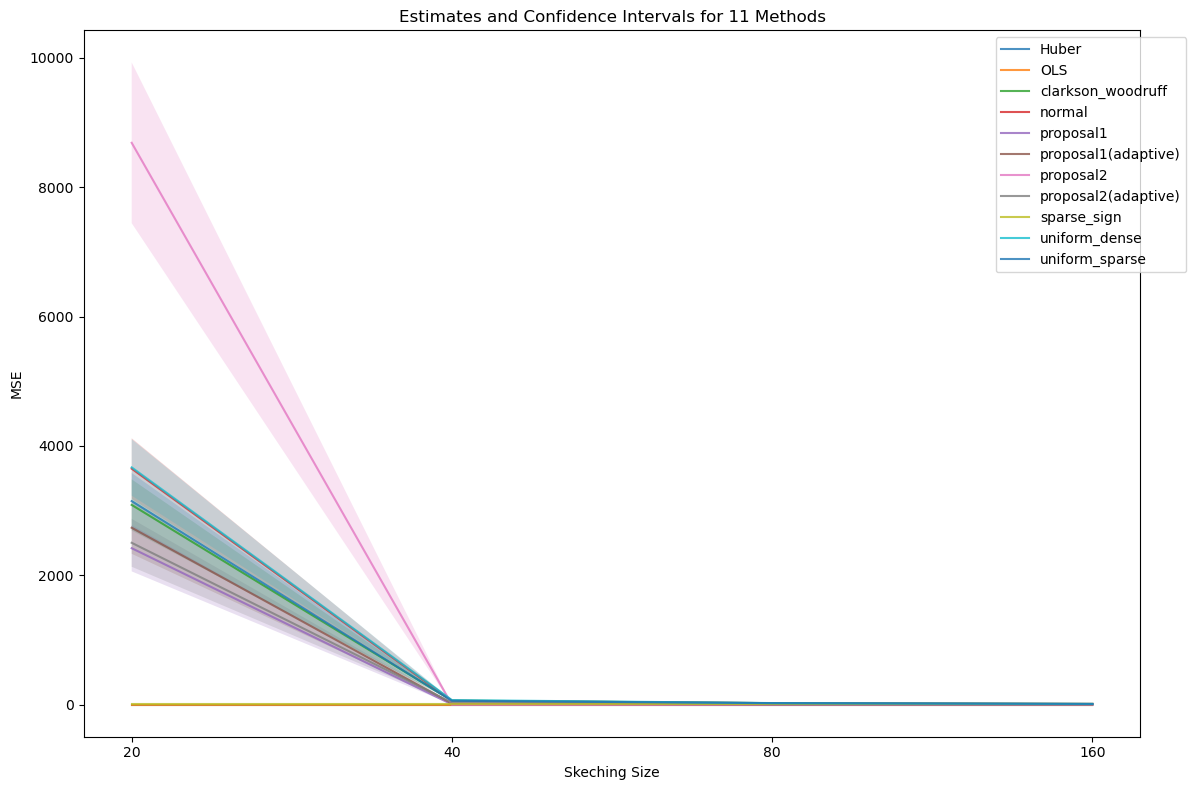

In [128]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 4)
new_x_labels = [20, 40, 80, 160]
method_exclude = set(['Huber', 'OLS'])

plt.figure(figsize=(12, 8))

for i, method in enumerate(sim_result.methods):
    y_estimate = sim_result.nparray[0,i,:]
    y_lower = sim_result.nparray[0,i,:] - sim_result.nparray[1,i,:]
    y_upper = sim_result.nparray[0,i,:] + sim_result.nparray[1,i,:]

    plt.plot(x, y_estimate, label=f'{method}', linestyle='-', alpha=0.8)
    plt.fill_between(x, y_lower, y_upper, alpha=0.2)  # Confidence interval shading

# Adding labels and title
plt.xlabel('Skeching Size')
plt.ylabel('MSE')
plt.xticks(x, new_x_labels)
plt.title('Estimates and Confidence Intervals for 11 Methods')
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))  # Place the legend outside the plot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


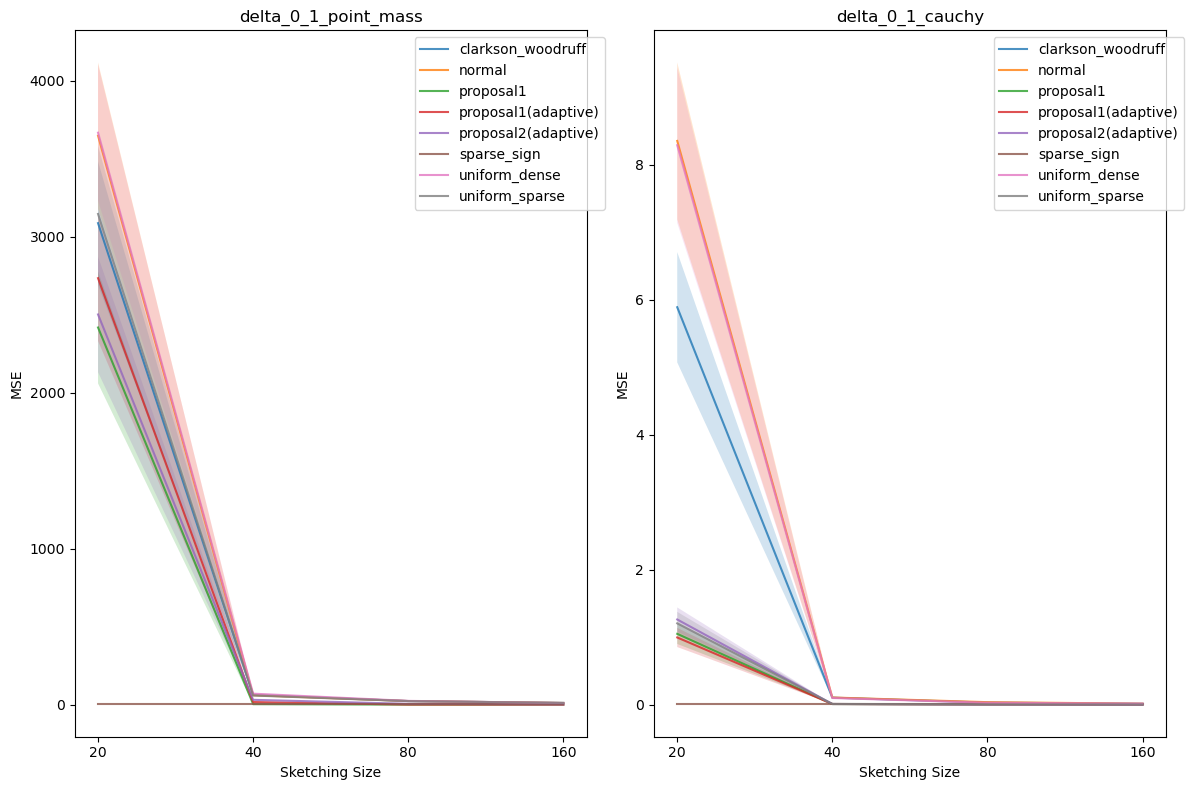

In [136]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 4)
new_x_labels = [20, 40, 80, 160]
method_exclude = set(['Huber', 'OLS', 'proposal2'])
tables_to_extract = ['delta_0_1_point_mass', 'delta_0_1_cauchy']

row = 1
col = 2
fig, axes = plt.subplots(row, col, figsize=(12, 8))
axes = axes.ravel()  # flatten the axes array

for i in range(2):
    table_name = tables_to_extract[i]
    sim_result = TableProcessor(html_table=html_content[table_name])
    sim_result.table_processor()
    sim_result.toarray()

    for j, method in enumerate(sim_result.methods):
        if method in method_exclude: continue
        y_estimate = sim_result.nparray[0,j,:]
        y_lower = sim_result.nparray[0,j,:] - sim_result.nparray[1,j,:]
        y_upper = sim_result.nparray[0,j,:] + sim_result.nparray[1,j,:]
        
        axes[i].plot(x, y_estimate, label=f'{method}', linestyle='-', alpha=0.8)
        axes[i].fill_between(x, y_lower, y_upper, alpha=0.2)  # Confidence interval shading

    axes[i].set_title(table_name)
    axes[i].set_xlabel('Sketching Size')
    axes[i].set_ylabel('MSE')
    axes[i].legend(loc='upper right', bbox_to_anchor=(1.05, 1))
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(new_x_labels)

plt.tight_layout()
plt.show()
